In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
def fillna_values(df):    
    '''fill nan values with zero'''     
    if isinstance(df, type(pd.Series(dtype='float64'))):       
        return df.fillna(0)    
    num_df = df.select_dtypes(include=['number']).fillna(0)
    non_num_df = df.select_dtypes(exclude=['number'])
    return pd.concat([num_df, non_num_df], axis=1)

In [57]:
df18=pd.read_excel("Transaction Data.xlsx",sheet_name='Transactions18')
df19=pd.read_excel("Transaction Data.xlsx",sheet_name='Transactions19')
firms=pd.read_excel('Firm Information.xlsx',sheet_name='Rep summary')

In [58]:
df18.rename({'CONTACT_ID':'Contact ID'},axis=1,inplace=True)
df19.rename({'CONTACT_ID':'Contact ID'},axis=1,inplace=True)
df18=fillna_values(df18)
df19=fillna_values(df19)

In [59]:
fullfeat=pd.merge(df18, firms, on = 'Contact ID')
full_df=pd.merge(fullfeat, df19, on = 'Contact ID',suffixes=['_2018', '_2019'])

In [60]:
full_df.columns

Index(['no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
       'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
       'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
       'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
       'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
       'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
       'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
       'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
       'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'Contact ID',
       'refresh_date_2018', 'CustomerID', 'Firm ID', 'Office ID', 'Channel',
       'Sub channel', 'Firm name', 's

In [61]:
full_eda=full_df[['new_Fund_added_12M_2018','new_Fund_added_12M_2019','Channel',
                  'Sub channel','Firm ID']]#,'sales_2018','redemption']]
channels=['Global', 'DCIO', 'Other','Affiliated']
for ch in channels:
    full_eda['Sub channel'] = np.where((full_eda['Sub channel'] == ch),'other sub' , full_eda['Sub channel'])
firmid=full_eda['Firm ID'].value_counts().nlargest(5).index.tolist()
for idf,fid in enumerate(full_eda['Firm ID']):
    if fid not in firmid:
        full_eda.loc[idf,'Firm ID']='other firms'

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [62]:
firmid

['1471422', '1948520', '1567450', '0022885', '0001194']

In [63]:
# [full_eda['new_Fund_added_12M_2018']<0]==True
# [full_eda['new_Fund_added_12M_2019']<0]==True

In [64]:
firmss=['1471422', '1948520', '1567450', '0022885', '0001194','other firms'] 
channelss=['IBD', 'NACS', 'RIA', 'USBT', 'other sub']
for f in firmss:
    for c in channelss:
        new_row = {'Sub channel':c, 'Firm ID':f}
        full_eda = full_eda.append(new_row, ignore_index=True)

In [65]:
dec_fn={'0001194': 'Ameriprise Financial Services, Inc.',
 '0022885': 'LPL Financial LLC',
 '1471422': 'Edward Jones',
 '1567450': 'Merrill Lynch',
 '1948520': 'Morgan Stanley Wealth Management',
 'other frims': 'other firms'}

In [66]:
for key, value in dec_fn.items():
    full_eda.replace([key], value, inplace=True)
grouped_df = full_eda.groupby(["Sub channel", "Firm ID"]).sum()
grouped_df= grouped_df.reindex(level =0,index = ['NACS','IBD','RIA','USBT','other sub'])
grouped_df

new_Fund_added_12M_2018  \
Sub channel Firm ID                                                        
NACS        Ameriprise Financial Services, Inc.                      0.0   
            Edward Jones                                             0.0   
            LPL Financial LLC                                        0.0   
            Merrill Lynch                                          586.0   
            Morgan Stanley Wealth Management                       388.0   
            other firms                                            610.0   
IBD         Ameriprise Financial Services, Inc.                    510.0   
            Edward Jones                                           510.0   
            LPL Financial LLC                                      379.0   
            Merrill Lynch                                            0.0   
            Morgan Stanley Wealth Management                         0.0   
            other firms                                           1802.0   
RIA         Ameriprise Financial Services, Inc.                      0.0   
            Edward Jones                                             0.0   
            LPL Financial LLC                                        0.0   
            Merrill Lynch                                            0.0   
            Morgan Stanley Wealth Management                         0.0   
            other firms                                            132.0   
USBT        Ameriprise Financial Services, Inc.                      0.0   
            Edward Jones                                             0.0   
            LPL Financial LLC                                        0.0   
            Merrill Lynch                                            0.0   
            Morgan Stanley Wealth Management                         0.0   
            other firms                                             11.0   
other sub   Ameriprise Financial Services, Inc.                      0.0   
            Edward Jones                                             0.0   
            LPL Financial LLC                                        0.0   
            Merrill Lynch                                            0.0   
            Morgan Stanley Wealth Management                         0.0   
            other firms                                              0.0   

                                                 new_Fund_added_12M_2019  
Sub channel Firm ID                                                       
NACS        Ameriprise Financial Services, Inc.                      0.0  
            Edward Jones                                             0.0  
            LPL Financial LLC                                        0.0  
            Merrill Lynch                                          554.0  
            Morgan Stanley Wealth Management                       512.0  
            other firms                                            641.0  
IBD         Ameriprise Financial Services, Inc.                    353.0  
            Edward Jones                                           453.0  
            LPL Financial LLC                                      299.0  
            Merrill Lynch                                            0.0  
            Morgan Stanley Wealth Management                         0.0  
            other firms                                           1441.0  
RIA         Ameriprise Financial Services, Inc.                      0.0  
            Edward Jones                                             0.0  
            LPL Financial LLC                                        0.0  
            Merrill Lynch                                            0.0  
            Morgan Stanley Wealth Management                         0.0  
            other firms                                             85.0  
USBT        Ameriprise Financial Services, Inc.                      0.0  
            Edward Jones                 

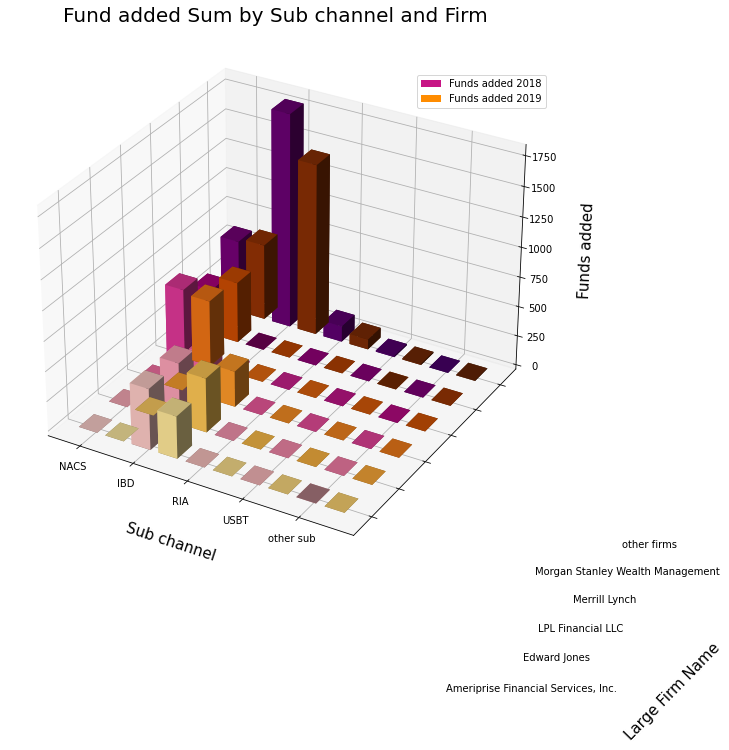

In [67]:
L = []
for i, group in grouped_df.groupby(level=1)['new_Fund_added_12M_2018']:
    L.append(group.values)
z = np.hstack(L).ravel()
xlabels = grouped_df.index.get_level_values('Sub channel').unique()
ylabels = grouped_df.index.get_level_values('Firm ID').unique()
x = np.arange(xlabels.shape[0])
y = np.arange(ylabels.shape[0])
S=[]
for i, group in grouped_df.groupby(level=1)['new_Fund_added_12M_2019']:
    S.append(group.values)
s = np.hstack(S).ravel()

x_M, y_M = np.meshgrid(x, y, copy=False)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Making the intervals in the axes match with their respective entries
ax.w_xaxis.set_ticks(x + 0.5/2.)
ax.w_yaxis.set_ticks(y + 0.5/2.)

# Renaming the ticks as they were before
ax.w_xaxis.set_ticklabels(xlabels)
ax.w_yaxis.set_ticklabels(ylabels)
ax.get_yaxis().set_tick_params(pad=135)

# Labeling the 3 dimensions
ax.set_xlabel('Sub channel',fontsize=15,labelpad=20)
ax.set_ylabel('Large Firm Name',labelpad=195,fontsize=15)
ax.set_zlabel('Funds added',fontsize=15,labelpad=20)

# Choosing the range of values to be extended in the set colormap
values = np.linspace(0.2, 1., x_M.ravel().shape[0])

# Selecting an appropriate colormap
colors = plt.cm.RdPu(values)
ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.35, dy=0.5, dz=z, color=colors)
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="mediumvioletred")
colors2 = plt.cm.YlOrBr(values)
b=ax.bar3d(x_M.ravel()+0.5, y_M.ravel(), s*0, dx=0.35, dy=0.5, dz=s, color=colors2)
red_proxy = plt.Rectangle((0, 0), 1, 1, fc="darkorange")
plt.title('Fund added Sum by Sub channel and Firm ',fontsize=20,pad=-50)
ax.legend([blue_proxy,red_proxy],['Funds added 2018','Funds added 2019'],bbox_to_anchor=(1, 0.92))

plt.show()

In [68]:
full_ed2=full_df[['new_Fund_added_12M_2018','new_Fund_added_12M_2019','Channel',
                  'Sub channel','Firm ID']]
markch=['Bank/Trust','Private Client Group','Asset Manager' ,
        'Discount','Networker','International Outlet','Low/Non Producer']
for mc in markch:
    full_ed2['Channel'] = np.where((full_ed2['Channel'] == mc),'other ch' , full_ed2['Channel'])
firmid=full_ed2['Firm ID'].value_counts().nlargest(5).index.tolist()
for idf,fid in enumerate(full_ed2['Firm ID']):
    if fid not in firmid:
        full_ed2.loc[idf,'Firm ID']='other firms'

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
full_ed2['new_Fund_added_12M_2018'].sum()

4928.0

In [70]:
firmss=['1471422', '1948520', '1567450', '0022885', '0001194','other firms'] 
markchnls=['Independent Dealer', 'National Broker-Dealer', 'Dual', 'Fee-Based Adviser', 'other ch']
for f in firmss:
    for m in markchnls:
        new_row = {'Channel':m, 'Firm ID':f}
        full_ed2 = full_ed2.append(new_row, ignore_index=True)

In [71]:
# full_ed2['Channel'].replace({'a': 'x', 'b': 'y', 'c': 'w', 'd': 'z'})

In [72]:
for key, value in dec_fn.items():
    full_ed2.replace([key], value, inplace=True)
grouped_d2 = full_ed2.groupby(["Channel", "Firm ID"]).sum()
grouped_d2= grouped_d2.reindex(level =0,index = ['National Broker-Dealer','Independent Dealer',
                                                 'Dual','Fee-Based Adviser','other ch'])
grouped_d2

new_Fund_added_12M_2018  \
Channel                Firm ID                                                        
National Broker-Dealer Ameriprise Financial Services, Inc.                      0.0   
                       Edward Jones                                             0.0   
                       LPL Financial LLC                                        0.0   
                       Merrill Lynch                                          586.0   
                       Morgan Stanley Wealth Management                       388.0   
                       other firms                                            174.0   
Independent Dealer     Ameriprise Financial Services, Inc.                    510.0   
                       Edward Jones                                           510.0   
                       LPL Financial LLC                                      379.0   
                       Merrill Lynch                                            0.0   
                       Morgan Stanley Wealth Management                         0.0   
                       other firms                                           2010.0   
Dual                   Ameriprise Financial Services, Inc.                      0.0   
                       Edward Jones                                             0.0   
                       LPL Financial LLC                                        0.0   
                       Merrill Lynch                                            0.0   
                       Morgan Stanley Wealth Management                         0.0   
                       other firms                                            181.0   
Fee-Based Adviser      Ameriprise Financial Services, Inc.                      0.0   
                       Edward Jones                                             0.0   
                       LPL Financial LLC                                        0.0   
                       Merrill Lynch                                            0.0   
                       Morgan Stanley Wealth Management                         0.0   
                       other firms                                            119.0   
other ch               Ameriprise Financial Services, Inc.                      0.0   
                       Edward Jones                                             0.0   
                       LPL Financial LLC                                        0.0   
                       Merrill Lynch                                            0.0   
                       Morgan Stanley Wealth Management                         0.0   
                       other firms                                             71.0   

                                                            new_Fund_added_12M_2019  
Channel                Firm ID                                                       
National Broker-Dealer Ameriprise Financial Services, Inc.                      0.0  
                       Edward Jones                                             0.0  
                       LPL Financial LLC                                        0.0  
                       Merrill Lynch                                          554.0  
                       Morgan Stanley Wealth Management                       512.0  
                       other firms                                            156.0  
Independent Dealer     Ameriprise Financial Services, Inc.                    353.0  
                       Edward Jones                                           453.0  
                       LPL Financial LLC                                      299.0  
                       Merrill Lynch                                            0.0  
                       Morgan Stanley Wealth Management                         0.0  
                       other firms                                           1711.0  
Dual                   Ameriprise Financial Services, Inc.             

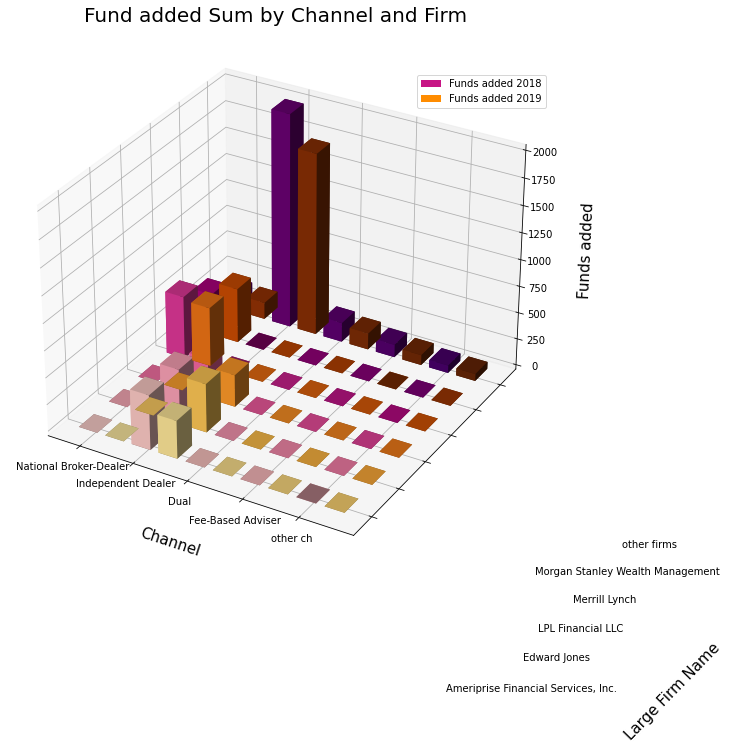

In [73]:
L = []
for i, group in grouped_d2.groupby(level=1)['new_Fund_added_12M_2018']:
    L.append(group.values)
z = np.hstack(L).ravel()
xlabels = grouped_d2.index.get_level_values('Channel').unique()
ylabels = grouped_d2.index.get_level_values('Firm ID').unique()
x = np.arange(xlabels.shape[0])
y = np.arange(ylabels.shape[0])
S=[]
for i, group in grouped_d2.groupby(level=1)['new_Fund_added_12M_2019']:
    S.append(group.values)
s = np.hstack(S).ravel()

x_M, y_M = np.meshgrid(x, y, copy=False)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Making the intervals in the axes match with their respective entries
ax.w_xaxis.set_ticks(x + 0.5/2.)
ax.w_yaxis.set_ticks(y + 0.5/2.)

# Renaming the ticks as they were before
ax.w_xaxis.set_ticklabels(xlabels)
ax.w_yaxis.set_ticklabels(ylabels)
ax.get_yaxis().set_tick_params(pad=135)

# Labeling the 3 dimensions
ax.set_xlabel('Channel',fontsize=15,labelpad=20)
ax.set_ylabel('Large Firm Name',labelpad=195,fontsize=15)
ax.set_zlabel('Funds added',fontsize=15,labelpad=20)

# Choosing the range of values to be extended in the set colormap
values = np.linspace(0.2, 1., x_M.ravel().shape[0])

# Selecting an appropriate colormap
colors = plt.cm.RdPu(values)
ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.35, dy=0.5, dz=z, color=colors)
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="mediumvioletred")
colors2 = plt.cm.YlOrBr(values)
b=ax.bar3d(x_M.ravel()+0.5, y_M.ravel(), s*0, dx=0.35, dy=0.5, dz=s, color=colors2)
red_proxy = plt.Rectangle((0, 0), 1, 1, fc="darkorange")
plt.title('Fund added Sum by Channel and Firm ',fontsize=20,pad=-50)
ax.legend([blue_proxy,red_proxy],['Funds added 2018','Funds added 2019'],bbox_to_anchor=(1, 0.92))

plt.show()

In [132]:
class01=pd.read_excel("class_ch_fi.xlsx")
# class01=pd.read_excel("class_ch_fi2.xlsx") #for firms sub channels

In [133]:
class01.head()

,Unnamed: 0,ch1,ch2,ch3,ch4,ch5,fid1,fid2,fid3,fid4,...,No_of_fund_curr.1,no_of_funds_sold_12M_1,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_assetclass_sold_12M_1,new_Fund_added_12M_2018,new_Fund_added_2019,new_Fund_added_2019_pred,Sub channel,Firm name
0,7002,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,IBD,otherid
1,5372,0,1,0,0,0,0,0,0,1,...,3,3,24,7,1,1,1,0,NACS,1567450
2,426,0,1,0,0,0,0,0,0,1,...,1,0,0,2,0,0,0,1,NACS,1567450
3,5187,1,0,0,0,0,0,0,1,0,...,0,1,3,4,1,1,1,1,IBD,1471422
4,9921,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,IBD,otherid


In [134]:
class01.drop(['Unnamed: 0','fid1','fid2','fid3','fid4','fid5','fid6','ch1', 'ch2','ch3','ch4','ch5'], axis=1, inplace=True)

In [135]:
class01.head()

,sales_2018,redemption,No_of_fund_curr,No_of_fund_curr.1,no_of_funds_sold_12M_1,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_assetclass_sold_12M_1,new_Fund_added_12M_2018,new_Fund_added_2019,new_Fund_added_2019_pred,Sub channel,Firm name
0,0.000,0.00,1,1,0,0,0,0,0,0,0,IBD,otherid
1,736060.795,296627.32,3,3,3,24,7,1,1,1,0,NACS,1567450
2,0.000,6300.00,1,1,0,0,2,0,0,0,1,NACS,1567450
3,1589.160,4199.26,0,0,1,3,4,1,1,1,1,IBD,1471422
4,0.000,6888.55,1,1,0,0,1,0,0,0,0,IBD,otherid


In [136]:
class01.drop(['sales_2018','redemption','No_of_fund_curr','No_of_fund_curr.1','no_of_sales_12M_1'], axis=1, inplace=True)

In [137]:
class01.head()

,no_of_funds_sold_12M_1,no_of_Redemption_12M_1,no_of_assetclass_sold_12M_1,new_Fund_added_12M_2018,new_Fund_added_2019,new_Fund_added_2019_pred,Sub channel,Firm name
0,0,0,0,0,0,0,IBD,otherid
1,3,7,1,1,1,0,NACS,1567450
2,0,2,0,0,0,1,NACS,1567450
3,1,4,1,1,1,1,IBD,1471422
4,0,1,0,0,0,0,IBD,otherid


In [138]:
class01['new_Fund_added_12M_2018'].value_counts()

0     1833
1      412
2      138
3       55
4       17
5       15
9        7
6        7
7        5
10       4
11       3
12       3
8        3
Name: new_Fund_added_12M_2018, dtype: int64

In [139]:
class01['new_Fund_added_12M_2018'] = np.where((class01['new_Fund_added_12M_2018'] > 0),1,0)
class01['new_Fund_added_2019'] = np.where((class01['new_Fund_added_2019'] > 0),1,0)

In [140]:
class01['new_Fund_added_12M_2018'].value_counts()

0    1833
1     669
Name: new_Fund_added_12M_2018, dtype: int64

In [141]:
class02=class01.groupby('Sub channel').sum()
class02

,no_of_funds_sold_12M_1,no_of_Redemption_12M_1,no_of_assetclass_sold_12M_1,new_Fund_added_12M_2018,new_Fund_added_2019,new_Fund_added_2019_pred
Sub channel,,,,,,
IBD,1908,24101,1122,431,386,359
NACS,1387,20604,809,217,254,254
RIA,96,4062,39,18,11,4
USBT,46,1308,13,3,3,0
other sub,0,0,0,0,0,0


In [142]:
class03=pd.DataFrame(class01['Sub channel'].value_counts())
class03

,Sub channel
IBD,1676
NACS,759
RIA,60
USBT,5
other sub,2


In [143]:
class03.rename({'Sub channel':'Counts'},axis=1,inplace=True)
class03.index.rename('Sub channel',inplace=True)

In [144]:
clss_r1=pd.merge(class02, class03,on='Sub channel')

In [145]:
clss_r1['no_of_funds_sold_12M_1/Advisor']=clss_r1['no_of_funds_sold_12M_1']/clss_r1['Counts']
clss_r1['no_of_Redemption_12M_1/Advisor']=clss_r1['no_of_Redemption_12M_1']/clss_r1['Counts']
clss_r1['no_of_assetclass_sold_12M_1/Advisor']=clss_r1['no_of_assetclass_sold_12M_1']/clss_r1['Counts']
clss_r1['New Fund added 2018/Advisor']=clss_r1['new_Fund_added_12M_2018']/clss_r1['Counts']
clss_r1['New Fund added 2019/Advisor']=clss_r1['new_Fund_added_2019']/clss_r1['Counts']
clss_r1['New Fund added 2019 pred/Advisor']=clss_r1['new_Fund_added_2019_pred']/clss_r1['Counts']

clss_r2=clss_r1.T
clss_r3=clss_r2.apply(lambda x: x/(clss_r2.sum(axis=1)))
clss_r3['Feature']=['no_of_funds_sold_12M_1','no_of_Redemption_12M_1','no_of_assetclass_sold_12M_1',
                    'new_Fund_added_12M_2018','new_Fund_added_2019','new_Fund_added_2019_pred','Counts',
                    'no_of_funds_sold_12M_1/Advisor',
                   'no_of_Redemption_12M_1/Advisor','no_of_assetclass_sold_12M_1/Advisor',
                   'New Fund added 2018/Advisor','New Fund added 2019/Advisor','New Fund added 2019 pred/Advisor']

In [146]:
clss_r3

Sub channel,IBD,NACS,RIA,USBT,other sub,Feature
no_of_funds_sold_12M_1,0.555135,0.403550,0.027931,0.013384,0.000000,no_of_funds_sold_12M_1
no_of_Redemption_12M_1,0.481298,0.411463,0.081118,0.026121,0.000000,no_of_Redemption_12M_1
no_of_assetclass_sold_12M_1,0.565809,0.407968,0.019667,0.006556,0.000000,no_of_assetclass_sold_12M_1
new_Fund_added_12M_2018,0.644245,0.324365,0.026906,0.004484,0.000000,new_Fund_added_12M_2018
new_Fund_added_2019,0.590214,0.388379,0.016820,0.004587,0.000000,new_Fund_added_2019
new_Fund_added_2019_pred,0.581848,0.411669,0.006483,0.000000,0.000000,new_Fund_added_2019_pred
Counts,0.669864,0.303357,0.023981,0.001998,0.000799,Counts
no_of_funds_sold_12M_1/Advisor,0.082699,0.132749,0.116230,0.668322,0.000000,no_of_funds_sold_12M_1/Advisor
no_of_Redemption_12M_1/Advisor,0.038778,0.073205,0.182565,0.705452,0.000000,no_of_Redemption_12M_1/Advisor
no_of_assetclass_sold_12M_1/Advisor,0.134284,0.213803,0.130383,0.521530,0.000000,no_of_assetclass_sold_12M_1/Advisor


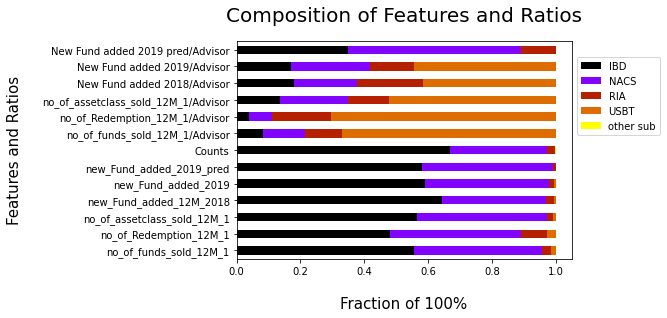

In [147]:
clss_r6=clss_r3.T
clss_r3=clss_r6.T
cmap = plt.cm.get_cmap('gnuplot')
clss_r3.plot(x='Feature', kind='barh',stacked=True, cmap=cmap)
# plt.xticks(rotation=45)
plt.title('Composition of Features and Ratios',fontsize=20,pad=20)
plt.ylabel("Features and Ratios",fontsize=15,labelpad=20)
plt.xlabel("Fraction of 100%",fontsize=15,labelpad=20)
plt.legend(loc='center left' ,bbox_to_anchor=(1, 0.75))

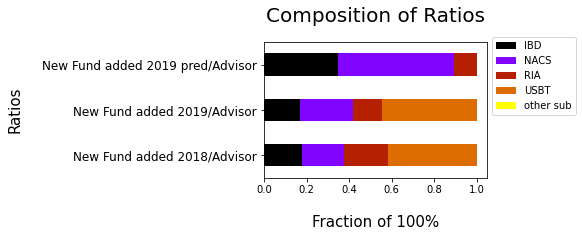

In [148]:

clss_r8=clss_r6[['New Fund added 2018/Advisor','New Fund added 2019/Advisor','New Fund added 2019 pred/Advisor']]

# clss_r8
clss_r9=clss_r8.T
cmap = plt.cm.get_cmap('gnuplot')
clss_r9.plot(x='Feature', kind='barh',stacked=True, cmap=cmap, figsize=(4,2.5))
# plt.xticks(rotation=45)
plt.title('Composition of Ratios',fontsize=20,pad=20)
plt.ylabel("Ratios",fontsize=15,labelpad=20)
plt.yticks(fontsize=12)
plt.xlabel("Fraction of 100%",fontsize=15,labelpad=20)
plt.legend(loc='center left' ,bbox_to_anchor=(1, 0.75))

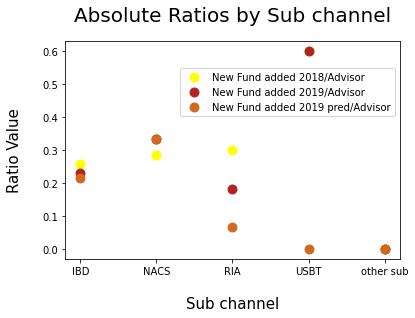

In [149]:
clss_r4=clss_r2.T[[
#     'no_of_funds_sold_12M_1/Advisor',
#                    'no_of_Redemption_12M_1/Advisor','no_of_assetclass_sold_12M_1/Advisor',
                  'New Fund added 2018/Advisor','New Fund added 2019/Advisor','New Fund added 2019 pred/Advisor']]
clss_r5=clss_r4.T
# a=plt.scatter(clss_r5.columns.tolist(),clss_r5.loc['no_of_funds_sold_12M_1/Advisor',:],facecolors='none',
#               edgecolors='black',s=80)
# b=plt.scatter(clss_r5.columns.tolist(),clss_r5.loc['no_of_Redemption_12M_1/Advisor',:],facecolors='none',
#               edgecolors='lime',s=80)
# c=plt.scatter(clss_r5.columns.tolist(),clss_r5.loc['no_of_assetclass_sold_12M_1/Advisor',:],facecolors='none',
#               edgecolors='blueviolet',s=80)
d=plt.scatter(clss_r5.columns.tolist(),clss_r5.loc['New Fund added 2018/Advisor',:],c='yellow',s=80)
e=plt.scatter(clss_r5.columns.tolist(),clss_r5.loc['New Fund added 2019/Advisor',:],c='firebrick',s=80)
f=plt.scatter(clss_r5.columns.tolist(),clss_r5.loc['New Fund added 2019 pred/Advisor',:],c='chocolate',s=80)
plt.title('Absolute Ratios by Sub channel',fontsize=20,pad=20)
plt.xlabel("Sub channel",fontsize=15,labelpad=20)
plt.ylabel("Ratio Value",fontsize=15,labelpad=20)
plt.legend([
#     a,b,c,
    d,e,f],
#            ['no_of_funds_sold_12M_1/Advisor',
#                    'no_of_Redemption_12M_1/Advisor','no_of_assetclass_sold_12M_1/Advisor'
                         ['New Fund added 2018/Advisor','New Fund added 2019/Advisor',
                          'New Fund added 2019 pred/Advisor'],
                       bbox_to_anchor=(1.0, 0.9))

In [150]:
clss_r5

Sub channel,IBD,NACS,RIA,USBT,other sub
New Fund added 2018/Advisor,0.25716,0.285903,0.300000,0.6,0.0
New Fund added 2019/Advisor,0.23031,0.334651,0.183333,0.6,0.0
New Fund added 2019 pred/Advisor,0.21420,0.334651,0.066667,0.0,0.0


In [151]:
# abc+1

NameError: name 'abc' is not defined

In [152]:
firm02=class01.groupby('Firm name').sum()
firm02

,no_of_funds_sold_12M_1,no_of_Redemption_12M_1,no_of_assetclass_sold_12M_1,new_Fund_added_12M_2018,new_Fund_added_2019,new_Fund_added_2019_pred
Firm name,,,,,,
1194,457,9071,239,68,50,54
22885,250,2792,139,43,47,49
1471422,214,1731,146,80,80,162
1567450,492,6628,271,93,89,108
1948520,366,4033,190,53,67,81
otherid,1658,25820,998,332,321,163


In [153]:
# firm03=pd.DataFrame(class01['Firm name'].value_counts())
# firm03.rename({'Firm name':'Counts'},axis=1,inplace=True)
# firm03.index.rename('Firm name',inplace=True)
# firm03.index = firm03.index.astype(int)
# firm03= firm03.sort_index()
# firm03
# frm_r1=pd.merge(firm03, firm02,on='Firm name')


In [154]:
# data=[150,202,245,220,201,1484]
# # firm03=pd.DataFrame()
# # data = [['tom', 10], ['nick', 15], ['juli', 14]] 
  
# # Create the pandas DataFrame 
# firm03 = pd.DataFrame(data, columns = ['Counts']) 
# firm03['Firm']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
# newdec.set_index(['decile'], inplace=True)
# firm03

In [164]:
# frm_r1=pd.concat((firm03[['Counts']],firm02),axis=1)
firm02['Counts']=[150,202,245,220,201,1484]
frm_r1=firm02.copy()
frm_r1['New Fund added 2018/Advisor']=frm_r1['new_Fund_added_12M_2018']/frm_r1['Counts']
frm_r1['New Fund added 2019/Advisor']=frm_r1['new_Fund_added_2019']/frm_r1['Counts']
frm_r1['New Fund added 2019 pred/Advisor']=frm_r1['new_Fund_added_2019_pred']/frm_r1['Counts']

frm_r2=frm_r1.T
frm_r3=frm_r2.apply(lambda x: x/(frm_r2.sum(axis=1)))
frm_r3['Feature']=['no_of_funds_sold_12M_1','no_of_Redemption_12M_1','no_of_assetclass_sold_12M_1',
                    'new_Fund_added_12M_2018','new_Fund_added_2019','new_Fund_added_2019_pred','Counts',
                   'New Fund added 2018/Advisor','New Fund added 2019/Advisor','New Fund added 2019 pred/Advisor']

In [165]:
frm_r7=frm_r3.T
frm_r7['Firm name']=['Ameriprise Financial Services, Inc.','LPL Financial LLC','Edward Jones',
                   'Merrill Lynch', 'Morgan Stanley Wealth Management',
                   'other firms','Feature']
# frm_r7.rename({'Firm ID':'Firm name'},axis=1,inplace=True)
frm_r7.set_index('Firm name', inplace=True)

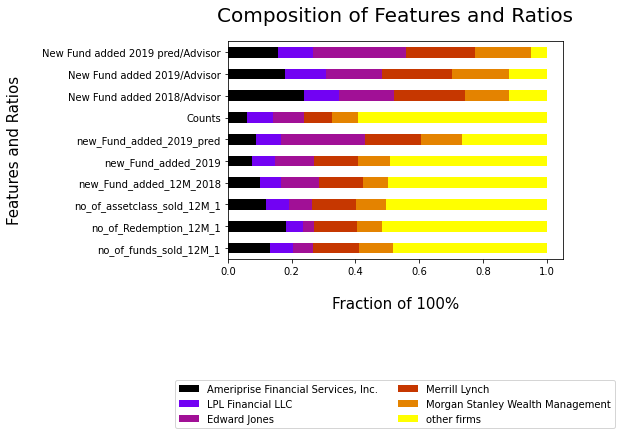

In [166]:
frm_r3=frm_r7.T
frm_r3
cmap = plt.cm.get_cmap('gnuplot')
frm_r3.plot(x='Feature', kind='barh',stacked=True, cmap=cmap)
# plt.xticks(rotation=45)
plt.title('Composition of Features and Ratios',fontsize=20,pad=20)
plt.ylabel("Features and Ratios",fontsize=15,labelpad=20)
plt.xlabel("Fraction of 100%",fontsize=15,labelpad=20)
plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, -0.8), ncol=2)

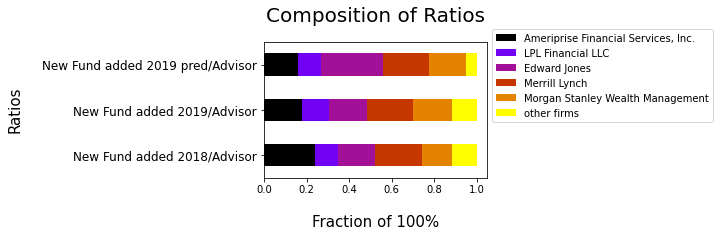

In [170]:
frm_r8=frm_r7[['New Fund added 2018/Advisor','New Fund added 2019/Advisor','New Fund added 2019 pred/Advisor']]
frm_r9=frm_r8.T
cmap = plt.cm.get_cmap('gnuplot')
frm_r9.plot(x='Feature', kind='barh',stacked=True, cmap=cmap, figsize=(4,2.5))
# plt.xticks(rotation=45)
plt.title('Composition of Ratios',fontsize=20,pad=20)
plt.yticks(fontsize=12)
plt.ylabel("Ratios",fontsize=15,labelpad=20)
plt.xlabel("Fraction of 100%",fontsize=15,labelpad=20)
plt.legend(loc='center left' ,bbox_to_anchor=(1, 0.75))

In [168]:
frm_r2

Firm name,1194,22885,1471422,1567450,1948520,otherid
no_of_funds_sold_12M_1,457.000000,250.000000,214.000000,492.000000,366.000000,1658.000000
no_of_Redemption_12M_1,9071.000000,2792.000000,1731.000000,6628.000000,4033.000000,25820.000000
no_of_assetclass_sold_12M_1,239.000000,139.000000,146.000000,271.000000,190.000000,998.000000
new_Fund_added_12M_2018,68.000000,43.000000,80.000000,93.000000,53.000000,332.000000
new_Fund_added_2019,50.000000,47.000000,80.000000,89.000000,67.000000,321.000000
new_Fund_added_2019_pred,54.000000,49.000000,162.000000,108.000000,81.000000,163.000000
Counts,150.000000,202.000000,245.000000,220.000000,201.000000,1484.000000
New Fund added 2018/Advisor,0.453333,0.212871,0.326531,0.422727,0.263682,0.223720
New Fund added 2019/Advisor,0.333333,0.232673,0.326531,0.404545,0.333333,0.216307
New Fund added 2019 pred/Advisor,0.360000,0.242574,0.661224,0.490909,0.402985,0.109838


{'0001194': 'Ameriprise Financial Services, Inc.', '0002096': 'Raymond James Financial Services, Inc.',
 '0022885': 'LPL Financial LLC', '0033509': 'Northwestern Mutual Investment Services, LLC', 
 '1471422': 'Edward Jones', '1567450': 'Merrill Lynch', '1688552': 'UBS Financial Services, Inc.', 
 '1948520': 'Morgan Stanley Wealth Management', '85201112683918276481': 'Wells Fargo Banking & Investment Services', 
 '9000166': 'Wells Fargo Advisors', 'smaller firms': 'other firms'}

In [171]:
frm_r4=frm_r2.T[['New Fund added 2018/Advisor','New Fund added 2019/Advisor','New Fund added 2019 pred/Advisor']]
frm_r4['Firm ID']=['Ameriprise Financial Services, Inc.','LPL Financial LLC','Edward Jones',
                   'Merrill Lynch', 'Morgan Stanley Wealth Management',
                   'other firms']
frm_r4.rename({'Firm ID':'Firm name'},axis=1,inplace=True)
frm_r4.set_index('Firm name', inplace=True)
frm_r4

,New Fund added 2018/Advisor,New Fund added 2019/Advisor,New Fund added 2019 pred/Advisor
Firm name,,,
"Ameriprise Financial Services, Inc.",0.453333,0.333333,0.360000
LPL Financial LLC,0.212871,0.232673,0.242574
Edward Jones,0.326531,0.326531,0.661224
Merrill Lynch,0.422727,0.404545,0.490909
Morgan Stanley Wealth Management,0.263682,0.333333,0.402985
other firms,0.223720,0.216307,0.109838


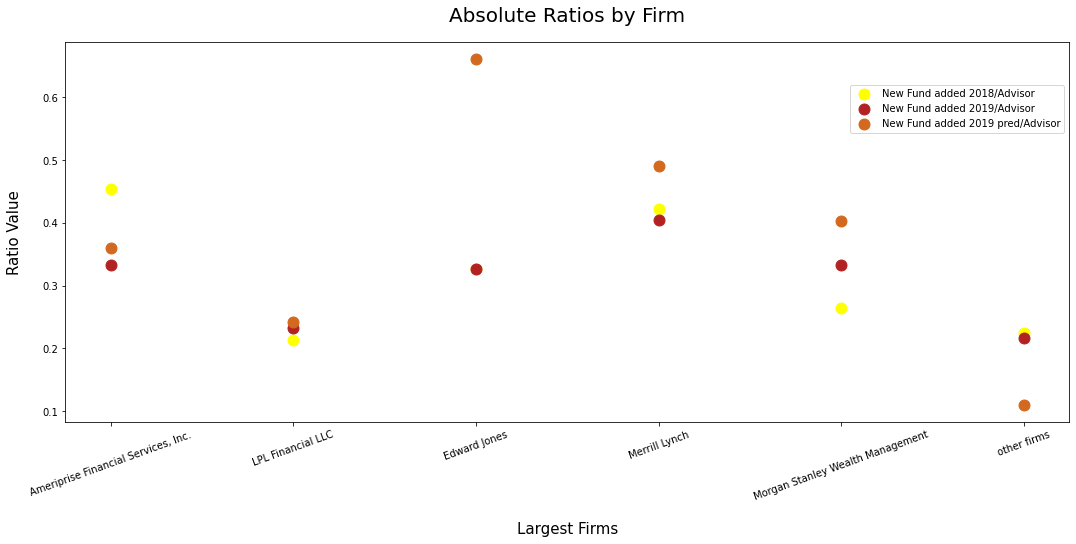

In [173]:
frm_r5=frm_r4.T
frm_r5
fcol=frm_r5.columns.tolist()
fcol=[str(i) for i in fcol]
type(fcol[1])
plt.figure(figsize=(18,7))
plt.xticks(rotation=20)
plt.title('Absolute Ratios by Firm',fontsize=20,pad=20)
plt.xlabel("Largest Firms",fontsize=15,labelpad=20)
plt.ylabel("Ratio Value",fontsize=15,labelpad=20)
# a=plt.scatter(fcol,frm_r5.loc['AUM/Advisor',:],facecolors='none',edgecolors='black',s=120)
b=plt.scatter(fcol,frm_r5.loc['New Fund added 2018/Advisor',:],c='yellow',s=120)
c=plt.scatter(fcol,frm_r5.loc['New Fund added 2019/Advisor',:],c='firebrick',s=120)
d=plt.scatter(fcol,frm_r5.loc['New Fund added 2019 pred/Advisor',:],c='chocolate',s=120)
# e=plt.scatter(fcol,frm_r5.loc['Redemption/Advisor',:],facecolors='none',edgecolors='blueviolet',s=120)
plt.legend([b,c,d],['New Fund added 2018/Advisor','New Fund added 2019/Advisor','New Fund added 2019 pred/Advisor'],bbox_to_anchor=(1, 0.9))

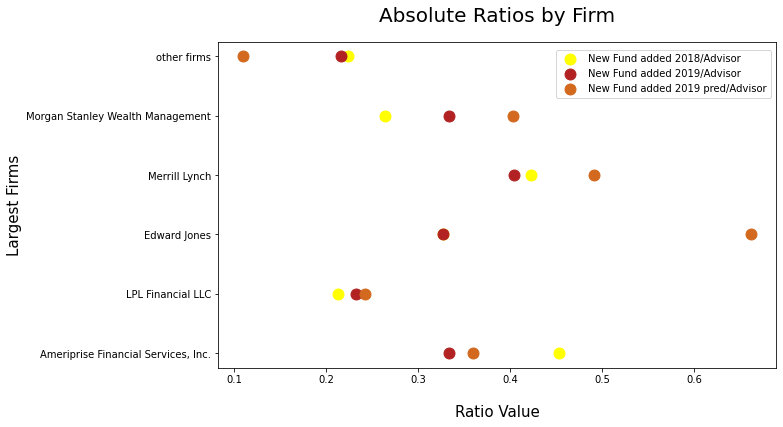

In [176]:
plt.figure(figsize=(10,6))
# plt.xticks(rotation=20)
plt.title('Absolute Ratios by Firm',fontsize=20,pad=20)
plt.ylabel("Largest Firms",fontsize=15)
plt.xlabel("Ratio Value",fontsize=15,labelpad=20)
# a=plt.scatter(frm_r4.loc[:,'AUM/Advisor'],fcol,facecolors='none',edgecolors='black',s=120)
b=plt.scatter(frm_r4.loc[:,'New Fund added 2018/Advisor'],fcol,c='yellow',s=120)
c=plt.scatter(frm_r4.loc[:,'New Fund added 2019/Advisor'],fcol,c='firebrick',s=120)
d=plt.scatter(frm_r4.loc[:,'New Fund added 2019 pred/Advisor'],fcol,c='chocolate',s=120)
# e=plt.scatter(frm_r4.loc[:,'Redemption/Advisor'],fcol,facecolors='none',edgecolors='blueviolet',s=120)
plt.legend([b,c,d],['New Fund added 2018/Advisor','New Fund added 2019/Advisor','New Fund added 2019 pred/Advisor'],bbox_to_anchor=(1, 0.99))

In [ ]:
frm_r4